In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [9]:
# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [10]:
# Using the inspector to print the column names within the 'measurement' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Using the inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])


id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)



# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01',)

In [14]:
# Identify most recent date

latest_date = session.query(func.max(Measurement.date)).first()[0]

latest_date 


'2017-08-23'

In [15]:
# Calculate the date one year from the last date in data set.

one_year_ago=dt.date(2017, 8, 23) - dt.timedelta(days=366)
one_year_ago

datetime.date(2016, 8, 22)

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Perform a query to retrieve the data and precipitation scores


recent_precip = session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date > '2016-08-22')\
    .filter(Measurement.date <= '2017-08-23')\
    .order_by(Measurement.date).all()
recent_precip

[('2016-08-23', 0.0),
 ('2016-08-23', 3.8),
 ('2016-08-23', 1.3),
 ('2016-08-23', None),
 ('2016-08-23', 0.5),
 ('2016-08-23', 45.5),
 ('2016-08-23', 17.8),
 ('2016-08-24', 2.0),
 ('2016-08-24', 54.6),
 ('2016-08-24', 57.9),
 ('2016-08-24', None),
 ('2016-08-24', 31.0),
 ('2016-08-24', 54.6),
 ('2016-08-24', 36.8),
 ('2016-08-25', 2.0),
 ('2016-08-25', 2.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 5.3),
 ('2016-08-25', 1.5),
 ('2016-08-25', 2.8),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.8),
 ('2016-08-26', 0.5),
 ('2016-08-26', 1.0),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.3),
 ('2016-08-27', 0.0),
 ('2016-08-27', 4.6),
 ('2016-08-27', 0.5),
 ('2016-08-27', 0.0),
 ('2016-08-27', 3.0),
 ('2016-08-27', None),
 ('2016-08-28', 0.3),
 ('2016-08-28', 3.6),
 ('2016-08-28', 3.6),
 ('2016-08-28', 3.6),
 ('2016-08-28', 15.2),
 ('2016-08-28', 52.6),
 ('2016-08-29', 0.0),
 ('2016-08-29', 4.3),
 ('2016-08-29', 1.0),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 8.9

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

precip_df=pd.DataFrame(recent_precip, columns=['Date', 'Precipitation'])
precip_df.dropna(axis=0, how='any', inplace= True)
precip_df.set_index('Date',inplace=True)
precip_df.head(10)

,Precipitation
Date,
2016-08-23,0.0
2016-08-23,3.8
2016-08-23,1.3
2016-08-23,0.5
2016-08-23,45.5
2016-08-23,17.8
2016-08-24,2.0
2016-08-24,54.6
2016-08-24,57.9


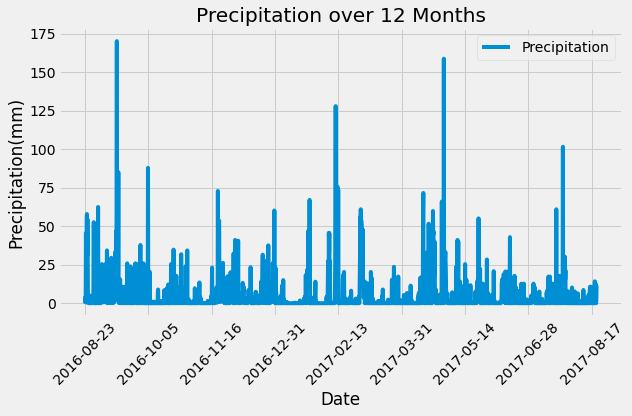

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data

ax = precip_df.plot(rot=45, title = "Precipitation over 12 Months", xlabel='Date', ylabel = "Precipitation(mm)", figsize=(9,6))

plt.tight_layout()
plt.show()


In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number stations in the dataset
total_stations=session.query(Station).count()
total_stations

9

In [21]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

sel = [Measurement.station, 
       func.count(Measurement.date)]
all_active_stations = session.query(*sel).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.date).desc()).all()
all_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [Measurement.station,
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]
temp_summary_per_station = session.query(*sel).\
        filter(Measurement.station == 'USC00519281').\
        group_by(Measurement.station)
for station in temp_summary_per_station:
    print(station)

('USC00519281', 12.2, 29.4, 22.03582251082252)


In [23]:
# Create lowest higest and average temp for the most active station into a dataframe

most_active_station_df=pd.DataFrame(temp_summary_per_station, columns=['station', 'min_temp', 
                                                          'max_temp', 'avg_temp'])
most_active_station_df.set_index('station',inplace=True)
most_active_station_df

,min_temp,max_temp,avg_temp
station,,,
USC00519281,12.2,29.4,22.035823


In [24]:
# Using the most active station id
# Query the last 12 months of temperature observation data for 	USC00519281  station

last_year_tobs=(session.query(Measurement.station,Measurement.date,(Measurement.tobs))
                  .filter(func.strftime(Measurement.date) > one_year_ago)
                  .filter(Measurement.station=='USC00519281')
                  .all())
last_year_tobs



[('USC00519281', '2016-08-23', 25.0),
 ('USC00519281', '2016-08-24', 25.0),
 ('USC00519281', '2016-08-25', 26.7),
 ('USC00519281', '2016-08-26', 26.7),
 ('USC00519281', '2016-08-27', 23.9),
 ('USC00519281', '2016-08-28', 22.8),
 ('USC00519281', '2016-08-29', 25.6),
 ('USC00519281', '2016-08-30', 25.0),
 ('USC00519281', '2016-08-31', 25.6),
 ('USC00519281', '2016-09-01', 26.7),
 ('USC00519281', '2016-09-02', 26.7),
 ('USC00519281', '2016-09-03', 25.6),
 ('USC00519281', '2016-09-04', 25.6),
 ('USC00519281', '2016-09-05', 25.6),
 ('USC00519281', '2016-09-06', 22.8),
 ('USC00519281', '2016-09-07', 23.3),
 ('USC00519281', '2016-09-08', 26.7),
 ('USC00519281', '2016-09-09', 26.1),
 ('USC00519281', '2016-09-10', 25.0),
 ('USC00519281', '2016-09-11', 26.7),
 ('USC00519281', '2016-09-12', 24.4),
 ('USC00519281', '2016-09-13', 26.1),
 ('USC00519281', '2016-09-14', 23.9),
 ('USC00519281', '2016-09-15', 26.1),
 ('USC00519281', '2016-09-16', 25.6),
 ('USC00519281', '2016-09-17', 26.1),
 ('USC005192

In [25]:
# convert the query of the last 12 months of temperature observation data for USC00519281 station into a dataframe
year_tobs_df = pd.DataFrame(last_year_tobs, columns=['station', 'date','temperature'])
year_tobs_df.head(10)

,station,date,temperature
0,USC00519281,2016-08-23,25.0
1,USC00519281,2016-08-24,25.0
2,USC00519281,2016-08-25,26.7
3,USC00519281,2016-08-26,26.7
4,USC00519281,2016-08-27,23.9
5,USC00519281,2016-08-28,22.8
6,USC00519281,2016-08-29,25.6
7,USC00519281,2016-08-30,25.0
8,USC00519281,2016-08-31,25.6
9,USC00519281,2016-09-01,26.7


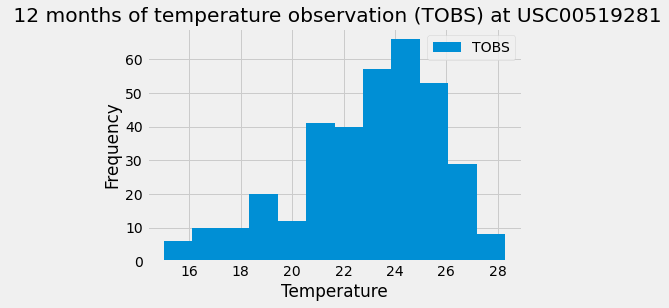

In [26]:
#plot the results as a histogram for last 12 months temperature data for USC00519281 station

plt.hist(year_tobs_df['temperature'],bins=12, density=False, label="TOBS")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend()
plt.title(" 12 months of temperature observation (TOBS) at USC00519281")
plt.figsize=(10,7)
plt.show()

# Close session

In [27]:
# Close Session
session.close()